# Assignment Netwerkanalyse

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Stefan Dijkstra | |
| | |
| | |
| | |

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

Cijfer per student:
 1    5.2
2    9.1
3    8.4
4    5.2
dtype: float64


,1,2,3,4
1,0.20,0.3,0.3,0.20
2,0.25,0.3,0.3,0.15
3,0.20,0.2,0.4,0.20
4,0.10,0.5,0.2,0.20


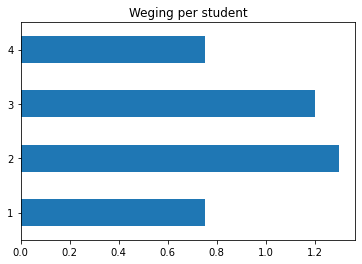

In [18]:
import pandas as pd
%matplotlib inline

def cijfer_per_student(weging,cijfer=7):
    return round(weging*cijfer,1)

weging= {
        1: {1:.2,2:.3,3:.3,4:.2},
        2: {1:.25,2:.3,3:.3,4:.15},
        3: {1:.2,2:.2,3:.4,4:.2},
        4: {1:.1,2:.5,3:.2,4:.2}
        }
# verander hier niks aan
df= pd.DataFrame(weging).T
assert all((df.sum(1)==1).values) # per student moeten de gewichten optellen tot 1
df.sum().plot(kind='barh', title='Weging per student');
print("Cijfer per student:\n",cijfer_per_student(df.sum()))
df

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

# Linked Data project

Maak een notebook met een end-to-end project gebaseerd op wikidata, en neem bijvoorbeeld deze als inspiratie:
* Mooie tutorial van begin tot eind met goede video: <https://media.ed.ac.uk/media/Wikidata+Sparql+Query+Tutorial/1_7v9v6s04> (Vrouwen educated in university of edinburg)
* Leuke tutorial met notebooks beschikbaar: <https://towardsdatascience.com/where-do-mayors-come-from-querying-wikidata-with-python-and-sparql-91f3c0af22e2>
* [Deze pagina](https://www.wikidata.org/wiki/Wikidata:WikiProject_every_politician/Netherlands/data/House/All_Members) over Nederlandse politici bevat een mooi begin, waar je nog heel wat moois van kan maken. 
* Of [deze](https://www.wikidata.org/wiki/Wikidata:WikiProject_Netherlands_Public_Libraries/Branches/By_Organisation) over bibliotheken. Ook hier kan je zowel het spreadsheet veel rijker maken, als natuurlijk op basis daarvan een geweldige interface maken.
    * Maar er is al een hoop mee gedaan hoor: zie bijvoorbeeld <https://www.wikidata.org/wiki/Wikidata:WikiProject_Netherlands_Public_Libraries/Maps#Country>
* <https://www.wikidata.org/wiki/Wikidata:WikiProject_COVID-19>


## Vereisten

1. Leuk probleem, goed uitgewerkt en gemotiveerd. Origineel, maar kan natuurlijk gebaseerd zijn op eerder werk.
    * Wees heel eerlijk met je inspiratiebronnen, en noem ze, en benoem exact waar jij verder bent gegaan (wat zijn jullie toevoegingen?)
2. Het moet gaan over **Nederlandse** data, of data over Nederland. 
    * Natuurlijk mag er ook een verband met het buitenland zijn.
2. Een dataset die je met SPARQL uit wikidata haalt, en die je netjes beschrijft, en aangeeft dat de data "klopt" met jouw probleem.
    * je dataset moet wel echt wat body hebben: dus flink wat rijen (items), en kolommen (eigenschappen)
    * je kan je data in spreadsheet formaat of SQL formaat of zelfs JSON formaat opslaan, en er dan later mee verder werken in Python-Pandas, SQL, of direct met python dicts.
3. Je laat nu op een aansprekende manier zien hoe jouw data jouw probleem oplost.
    * Dit kan prima in een jupyter notebook. Het is een **functioneel prototype** voor een mogelijke webapplicatie. 
    * Je kan [python widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Basics.html) gebruiken voor interactie met gebruiker
    * of plotly en dash voor gave interactieve plots en visuals (of seaborn als je het saai statisch wilt houden)
4. Schrijf een reflectie.
5. Jouw hele "blogpost/tutorial" is een Jupyter notebook die standalone perfect draait. (mits verbonden met het web).
6. Je plaatst je notebook op een publiek github adres, of ergens op Google colab. Met gedraaide output. Het is belangrijk dat anderen jouw notebook 
    * heel makkelijk kunen lezen
    * heel makkelijk kunnen downloaden, en runnen.
        * dus als je niet standaard modules gebruikt zet je in een aparte uitgecommentarieerde cel de `pip install commands`
7. En levert hem natuurlijk ook weer in via Canvas.

### Grading

* Ook hier weer via peer review binnen je groep.
* Plus een expert review van je tutor.
* Maak er wat moois, leerzaams, gaafs, en verrassends van! 

In [19]:
# conda install -c plotly plotly

In [20]:
import requests
import pandas as pd
from collections import OrderedDict
import matplotlib.pyplot as plt
import plotly.express as px
import plotly
import numpy as np
plotly.offline.init_notebook_mode(connected=True)
%matplotlib inline

vanaf = 2006

url = 'https://query.wikidata.org/sparql'
query = """
SELECT DISTINCT ?lidLabel ?plaatsLabel ?woonplaatsLabel ?partijLabel ?geslachtLabel ?start ?end ?followers ?ideologyLabel WHERE { 
  ?lid wdt:P39 wd:Q18887908 .
  ?lid wdt:P19 ?plaats .
  ?lid wdt:P102 ?partij .
  ?lid p:P39 ?functie .
  ?lid wdt:P21 ?geslacht .
  ?functie pq:P580 ?start .
  FILTER(YEAR(?start) >= %d) .
  OPTIONAL {?lid wdt:P8687 ?followers} .
  OPTIONAL {?functie pq:P582 ?end} .
  OPTIONAL {?lid wdt:P551 ?woonplaats} .
  OPTIONAL {?partij wdt:P1387 ?ideology}
  SERVICE wikibase:label { 
    bd:serviceParam wikibase:language "nl". 
  }
}
""" % vanaf

r = requests.get(url, params={'format': 'json', 'query': query})
data = r.json()


a = []

for item in data['results']['bindings']:
    a.append(OrderedDict({
        label: item[label]['value'] if label in item else None
        for label in ['lidLabel', 'plaatsLabel','woonplaatsLabel', 'partijLabel', 'geslachtLabel', 'start','end', 'followers','ideologyLabel']
    }))

df = pd.DataFrame(a)
df = df.rename(columns={'lidLabel': 'Lid', 'plaatsLabel': 'Geboorteplaats', 'partijLabel': 'Partij',
                        'start': 'Startjaar','end':'Eindjaar', 'geslachtLabel': 'Geslacht', 'followers': 'Followers',
                        'woonplaatsLabel':'Woonplaats', 'ideologyLabel':'Ideologie'})
# Verander Eindjaar Mark Rutte naar np.nan
# df.loc[88, 'Eindjaar'] = np.nan

# Behoud alleen de meest recente partij en startjaar waar een lid is gestart
df = df.sort_values(by='Startjaar', ascending=False).drop_duplicates(
    'Lid', keep='first').reset_index(drop=True)

# Maak van timestamp een jaartal
df['Startjaar'] = pd.DatetimeIndex(df['Startjaar']).year
df['Eindjaar'] = pd.DatetimeIndex(df['Eindjaar']).year

# Maak van None np.nan
df['Followers'].fillna(value=np.nan, inplace=True)
df['Eindjaar'].fillna(value=np.nan, inplace=True)
df['Woonplaats'].fillna(value=np.nan, inplace=True)
df['Ideologie'].fillna(value=np.nan, inplace=True)

# Maak van str integers
df['Followers'] = pd.to_numeric(df['Followers'])

df

,Lid,Geboorteplaats,Woonplaats,Partij,Geslacht,Startjaar,Eindjaar,Followers,Ideologie
0,Sharon Dijksma,Groningen,Enschede,Partij van de Arbeid,vrouwelijk,2021,NaN,33487.0,centrum-links
1,Martijn Bolkestein,Overveen,Aerdenhout,Volkspartij voor Vrijheid en Democratie,mannelijk,2020,NaN,NaN,centrum-rechts
2,Julius Terpstra,Emmeloord,Leiden,Christen-Democratisch Appèl,mannelijk,2020,NaN,3146.0,centrum-rechts
3,Tom van den Nieuwenhuijzen-Wittens,Weert,Utrecht,GroenLinks,mannelijk,2020,NaN,5301.0,centrum-links
4,Femke Merel Arissen,Huizen,Utrecht,Partij van de Toekomst,vrouwelijk,2020,NaN,11219.0,NaN
...,...,...,...,...,...,...,...,...,...
317,Paul Ulenbelt,Haaksbergen,Leiden,Socialistische Partij,mannelijk,2006,2017.0,9909.0,links
318,Tofik Dibi,Vlissingen,NaN,GroenLinks,mannelijk,2006,2012.0,NaN,centrum-links
319,Geert Wilders,Venlo,Den Haag,Volkspartij voor Vrijheid en Democratie,mannelijk,2006,NaN,845934.0,centrum-rechts
320,Martin Bosma,Wormer,Amsterdam,Partij voor de Vrijheid,mannelijk,2006,NaN,34808.0,rechts


In [21]:


# ''' Filter steden waar minder dan 5 mensen vandaan komen eruit '''
# grote_steden = set(df.groupby('Geboorteplaats')['Lid'].count()[df.groupby('Geboorteplaats')['Lid'].count() >= 5].index)
# df_grote_steden = df[df['Geboorteplaats'].isin(grote_steden)]



In [22]:
''' Per Partij, per Geboorteplaats van leden uit die Partij, 
    het aantal mensen van die Partij die geboren zijn in die Geboorteplaats '''
df.groupby(['Partij','Geboorteplaats'])['Lid'].count()[:20]# [('Partij voor de Vrijheid', 'Amsterdam')]

Partij                       Geboorteplaats     
50Plus                       Bilthoven              1
                             Goes                   1
                             Haarlem                1
                             Hengelo                1
                             Tilburg                1
Christen-Democratisch Appèl  's-Hertogenbosch       1
                             Alphen aan den Rijn    2
                             Amsterdam              2
                             Apeldoorn              2
                             Arnhem                 1
                             Bennekom               1
                             Biezelinge             2
                             Bolsward               1
                             Boxmeer                1
                             Buitenpost             1
                             Den Haag               4
                             Diepenheim             1
                             Dirk

In [23]:
'''Aantal nieuwe leden per partij vanaf %jaartal'''
tab = df.groupby('Partij')['Lid'].count().sort_values(ascending=True)
fig = px.bar(tab[tab >= 2], color=tab[tab >= 2].index, orientation='h',
             title='Aantal nieuwe Tweede kamerleden per partij vanaf %d' % vanaf)
fig.update_layout(xaxis_title='Aantal',showlegend=False)
fig.show()
tab.head()

Partij
Lid-van Vliet                          1
Reformatorische Politieke Federatie    1
Partij van de Toekomst                 1
Nieuwe Wegen                           1
Lid-Brinkman                           1
Name: Lid, dtype: int64

In [24]:
''' Top %d steden waar meeste nieuwe leden vandaan komen vanaf %jaartal '''
top_x_steden = 5
tab = df.groupby('Geboorteplaats')['Lid'].count().sort_values(ascending=False)
fig = px.pie(tab, values=tab[:top_x_steden].values, names=tab[:top_x_steden].index,
             title='Top %d steden waar meeste nieuwe Tweede kamerleden vandaan komen vanaf %d' % (top_x_steden, vanaf))
fig.show()
tab.head()

Geboorteplaats
Den Haag     19
Haarlem      13
Amsterdam    13
Rotterdam    13
Groningen     8
Name: Lid, dtype: int64

In [25]:
''' Populairste woonplaatsen van leden vanaf %jaartal '''
top_x_steden = 5
tab = df.groupby('Woonplaats')['Lid'].count().sort_values(ascending=False)
fig = px.pie(tab, values=tab[:top_x_steden].values, names=tab[:top_x_steden].index,
             title='Top %d populairste woonplaatsen van nieuwe Tweede kamerleden vanaf %d' %  (top_x_steden,vanaf))
fig.show()
tab.head()

Woonplaats
Den Haag     31
Amsterdam    30
Leiden        9
Utrecht       8
Haarlem       7
Name: Lid, dtype: int64

In [26]:
'''Man/vrouw verdeling'''
tab = df.groupby('Geslacht')['Lid'].count()
fig = px.bar(tab, color=tab.index, title='Man/vrouw verdeling vanaf %d'%vanaf)
fig.update_layout(yaxis_title='Aantal',showlegend=False)
fig.show()
tab.head()

Geslacht
mannelijk     195
vrouwelijk    127
Name: Lid, dtype: int64

In [27]:
'''Aantal nieuwe mannelijke/vrouwelijke Tweede kamerleden per jaar'''
tab = df.groupby(['Startjaar','Geslacht'])['Lid'].count().unstack()
fig = px.line(tab, title = 'Aantal nieuwe mannelijke/vrouwelijke Tweede kamerleden per jaar (%d - 2021)'%vanaf)
fig.update_layout(yaxis_title='Aantal', xaxis=dict(tickmode='array', tickvals=tab.index))
fig.show()
tab.head()

Geslacht,mannelijk,vrouwelijk
Startjaar,,
2006,18.0,9.0
2007,8.0,3.0
2008,6.0,4.0
2009,2.0,1.0
2010,22.0,17.0


In [28]:
'''Totaal aantal Twitter volgers van actieve Tweede kamerleden per Partij'''
actieve_leden = df[df['Eindjaar'].isnull()]
tab = actieve_leden.groupby('Partij')['Followers'].sum().sort_values(ascending=False)
fig = px.bar(tab, color=tab.index,
             title='Totaal aantal Twitter volgers van actieve Tweede kamerleden per Partij vanaf %d'%vanaf,
             orientation='h')
fig.update_layout(showlegend=False, yaxis_title = 'Totaal aantal volgers')
fig.show()
tab.head()

Partij
Volkspartij voor Vrijheid en Democratie    1062948.0
Partij van de Arbeid                        602092.0
Socialistische Partij                       363269.0
GroenLinks                                  338649.0
Forum voor Democratie                       316147.0
Name: Followers, dtype: float64

In [29]:
top_x_leden = 10
actieve_leden = df[df['Eindjaar'].isnull()]
tab = actieve_leden.sort_values(by='Followers', ascending=False)[['Lid', 'Followers']]
fig = px.bar(tab[:top_x_leden], x='Lid', y='Followers', color='Lid',
             title='Top %d actieve Tweede kamerleden met meeste volgers op Twitter' % top_x_leden)
fig.update_layout(showlegend=False)
fig.show()
tab.head()



,Lid,Followers
319,Geert Wilders,845934.0
93,Lodewijk Asscher,333383.0
253,Jesse Klaver,274478.0
75,Thierry Baudet,244273.0
269,Emile Roemer,189942.0


In [30]:
top_x_leden = 3
inactieve_leden = df[~df['Eindjaar'].isnull()]
tab = inactieve_leden.sort_values(by='Followers', ascending=False)[['Lid', 'Followers']]
fig = px.bar(tab[:top_x_leden], x='Lid', y='Followers', color='Lid',
             title='Top %d inactieve Tweede kamerleden met meeste volgers op Twitter' % top_x_leden)
fig.update_layout(showlegend=False)
fig.show()
tab.head()

,Lid,Followers
307,Alexander Pechtold,642478.0
7,Frans Timmermans,170254.0
198,Diederik Samsom,146483.0
88,Mark Rutte,134130.0
210,Marianne Thieme,122527.0


In [31]:
'''Aantal mannen/vrouwen per Partij vanaf %d'''
tab = df.groupby(['Partij', 'Geslacht'])['Lid'].count().unstack().sort_values(by=['mannelijk','vrouwelijk'], ascending=True)
fig = px.bar(tab[(tab['mannelijk'] > 1) | (tab['vrouwelijk'] > 1)],
             title='Aantal mannen/vrouwen per Nederlandse politieke partij vanaf %d' % vanaf, orientation='h')
fig.update_layout(yaxis_title='Aantal')
fig.show()

In [32]:
'''Aantal volgers op Twitter per politieke ideologie vanaf %d'''
tab = df.groupby('Ideologie')['Followers'].sum()
tab = tab[['links', 'centrum-links', 'politiek centrum',
           'centrum-rechts', 'rechts', 'extreemrechts']]
fig = px.bar(tab, color=tab.index,
             title='Aantal volgers op Twitter per politieke ideologie in Nederland vanaf %d' % vanaf)
fig.update_layout(yaxis_title='Aantal volgers op Twitter', showlegend=False)
fig.show()
tab.head()

Ideologie
links                566372.0
centrum-links       1451975.0
politiek centrum    1298389.0
centrum-rechts      1851112.0
rechts               328044.0
Name: Followers, dtype: float64

In [33]:
'''Verdeling van Politieke Ideologie onder Nederlandse Politieke Partijen vanaf %d'''
tab = df.groupby('Ideologie')['Partij'].unique()
tab = tab[['links', 'centrum-links', 'politiek centrum',
           'centrum-rechts', 'rechts', 'extreemrechts']]
fig = px.pie(names=tab.index, values=[len(x) for x in tab.values], color=tab.index,
             title='Verdeling van Politieke Ideologie onder Nederlandse Politieke Partijen vanaf %d' % vanaf)
# fig.update_layout(yaxis_title='Aantal partijen', xaxis_title='Ideologie', showlegend=False, yaxis=dict(
#     tickmode='array', tickvals=list(range(max([len(x) for x in tab.values])+1))))
fig.update_layout(showlegend=True)
fig.show()
tab.head()

Ideologie
links                  [Partij voor de Dieren, Socialistische Partij]
centrum-links                      [Partij van de Arbeid, GroenLinks]
politiek centrum                [Democraten 66, ChristenUnie, 50Plus]
centrum-rechts      [Volkspartij voor Vrijheid en Democratie, Chri...
rechts              [Partij voor de Vrijheid, Forum voor Democrati...
Name: Partij, dtype: object